Successfully loaded Sentence-BERT model: paraphrase-multilingual-MiniLM-L12-v2
Starting song data analysis...
Processed 100/2263 songs...
Processed 200/2263 songs...
Processed 300/2263 songs...
Processed 400/2263 songs...
Processed 500/2263 songs...
Processed 600/2263 songs...
Processed 700/2263 songs...
Processed 800/2263 songs...
Processed 900/2263 songs...
Processed 1000/2263 songs...
Processed 1100/2263 songs...
Processed 1200/2263 songs...
Processed 1300/2263 songs...
Processed 1400/2263 songs...
Processed 1500/2263 songs...
Processed 1600/2263 songs...
Processed 1700/2263 songs...
Processed 1800/2263 songs...
Processed 1900/2263 songs...
Processed 2000/2263 songs...

Successfully processed 2029 songs.

Similarity Statistics Summary:
count    2029.000000
mean        0.428590
std         0.088273
min         0.070374
25%         0.370835
50%         0.429076
75%         0.484919
max         0.830086
Name: avg_comment_similarity_to_lyrics, dtype: float64


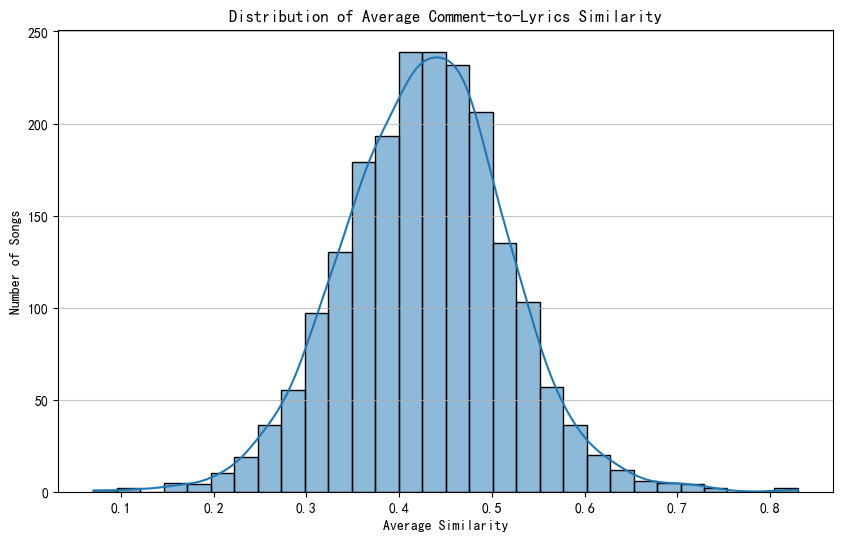

C:\Users\33398\AppData\Local\Temp\ipykernel_51664\3256045413.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_comment_similarity_to_lyrics', y='song_name', data=sorted_df, palette='viridis')


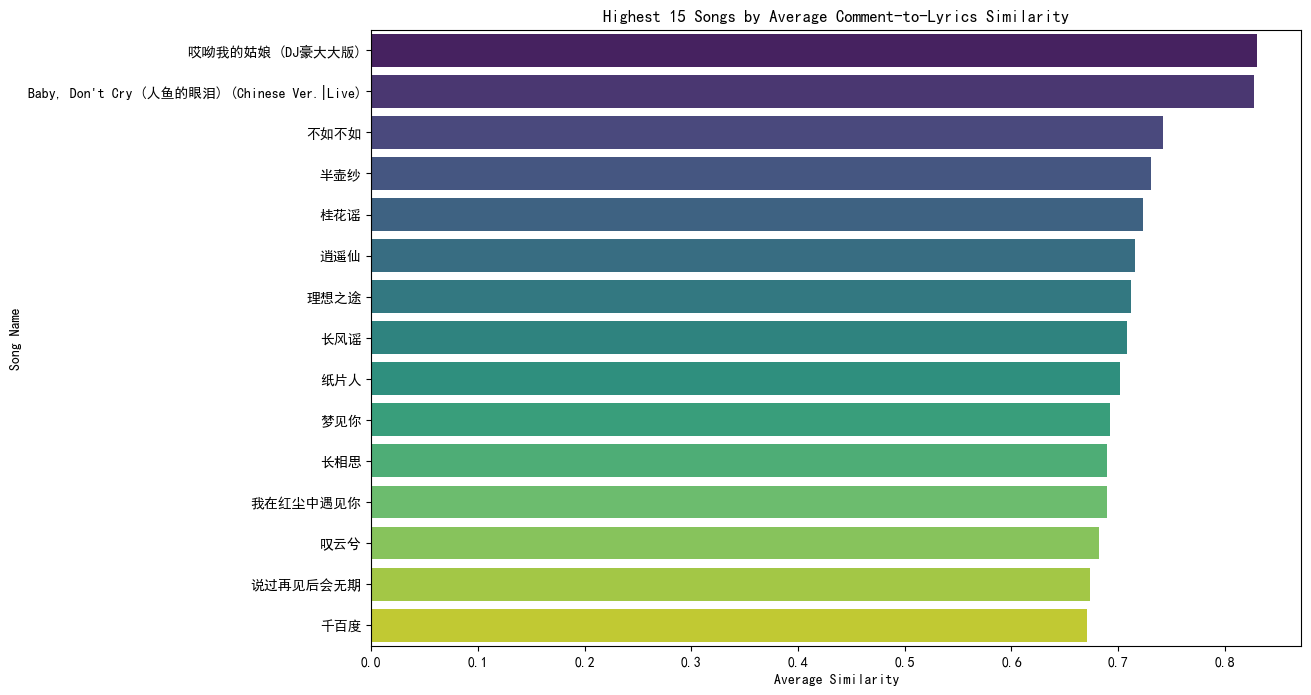

C:\Users\33398\AppData\Local\Temp\ipykernel_51664\3256045413.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_comment_similarity_to_lyrics', y='song_name', data=sorted_df, palette='viridis')


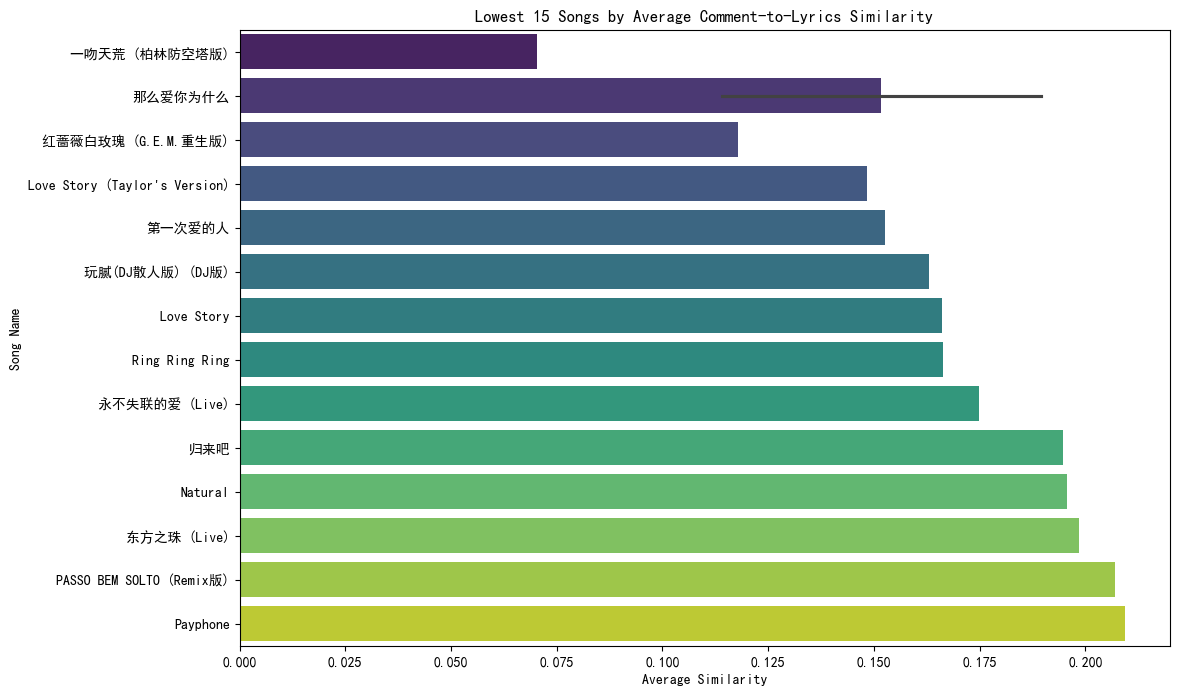


Lyrics and some comments for the song with highest similarity (330770014):
Lyrics:
 哎呦我的姑娘 (DJ豪大大版) - 野哥
词：任天宇
曲：任天宇
制作人：任天宇
DJ制作：豪大大
封面：灭害灵
监制：刘家泽
发行：冯昌榆
制作公司：匠心音乐/梨云音乐社
OP：匠心音乐
你的辫子长长 你的眼睛亮亮
我的心儿慌慌 我的大脑缺氧
哎呦我的姑娘 哎呦我的姑娘
忘掉你的忧伤 寻破晓的微光
热情就像太阳 柔情就像月亮
你是我的星光 亦是我的信仰
哎呦我的姑娘 哎呦我的姑娘
有你才是家乡 哪怕流浪
姑娘 我心上的姑娘
你为什么惆怅
我在北方 你在南方
姑娘 我心上的姑娘
你要把我原谅
原谅我的 昼思夜想
弯弯的眉 它烙进了我的心房
小小的嘴 它会不会印在我脸上
你的辫子长长 你的眼睛亮亮
我的心儿慌慌 我的大脑缺氧
哎呦我的姑娘 哎呦我的姑娘
忘掉你的忧伤 寻破晓的微光
热情就像太阳 柔情就像月亮
你是我的星光 亦是我的信仰
哎呦我的姑娘 哎呦我的姑娘
有你才是家乡 哪怕流浪
姑娘 我心上的姑娘
你为什么惆怅
我在北方 你在南方
姑娘 我心上的姑娘
你要把我原谅
原谅我的 昼思夜想
弯弯的眉 它烙进了我的心房
小小的嘴 它会不会印在我脸上
你的辫子长长 你的眼睛亮亮
我的心儿慌慌 我的大脑 缺氧
哎呦我的姑娘 哎呦我的姑娘
忘掉你的忧伤 寻破晓的微光
热情就像太阳 柔情就像月亮
你是我的星光 亦是我的信仰
哎呦我的姑娘 哎呦我的姑娘
有你才是家乡 哪怕流浪
 ...

Hot Comments:
Comment 1: 你的吊带长长，你的肩膀光光。 我的心儿慌慌，我的大脑缺氧。 哎呦我的姑娘，哎呦我的姑娘。 穿好你的衣裳、千万不要着凉。 哎呦我的姑娘， 你的礼单长长，  哎呦我的姑娘，你的要求荒唐 我的心儿慌慌，我的大脑缺氧 哎呦我的姑娘，要完车又要房 哎呦我的姑娘，让我一生匆忙 哎呦我的姑娘，让我此刻彷徨...

Analysis complete.


In [8]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import jieba # For Chinese text segmentation

SONGS_DIR: str = './Song'
MODEL_NAME: str = 'paraphrase-multilingual-MiniLM-L12-v2'

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False 

try:
    # Attempt to load the pre-trained Sentence-BERT model.
    model = SentenceTransformer(MODEL_NAME)
    print(f"Successfully loaded Sentence-BERT model: {MODEL_NAME}")
except Exception as e:
    print(f"Failed to load Sentence-BERT model: {e}")
    print("Please ensure your network connection is stable or try a different model name.")

def preprocess_text(text: str) -> str:
    """
    Preprocesses text by cleaning it, performing Chinese word segmentation,
    and removing lines that contain a colon (冒号), typically found in metadata.

    Args:
        text (str): The input string (e.g., song lyrics or comment content).

    Returns:
        str: The preprocessed string with spaces, newlines removed,
             Chinese words segmented, and colon-containing lines removed.
    """
    if not isinstance(text, str):
        return ""
    
    lines = text.split('\n')
    cleaned_lines = []
    
    for line in lines:
        stripped_line = line.strip()
        # Keep the line only if it doesn't contain a colon (either ':' or '：')
        # and is not empty after stripping.
        if stripped_line and ':' not in stripped_line and '：' not in stripped_line:
            cleaned_lines.append(stripped_line)

    # Join the remaining lines and then perform general cleaning and segmentation
    text = ' '.join(cleaned_lines)
    text = text.replace('\n', ' ').replace('\r', ' ').strip()
    text = ' '.join(text.split())
    
    # Segment Chinese text into individual words using Jieba.
    words = jieba.lcut(text)
    return ' '.join(words)
                                                                               
def analyze_song_data(songs_dir: str) -> pd.DataFrame:
    """
    Loads song data, preprocesses lyrics and comments, and calculates the
    average semantic similarity between comments and lyrics for each song.

    Args:
        songs_dir (str): The path to the directory containing song data folders.
                         Each song folder should contain a 'data.json' file.

    Returns:
        pd.DataFrame: A DataFrame containing song information, number of comments,
                      and the average comment-to-lyrics similarity for each song.
                      Returns an empty DataFrame if no valid song data is found.
    """
    data: list[dict] = []
    processed_songs_count: int = 0
    total_songs_count: int = len(os.listdir(songs_dir))

    for kuwo_id in os.listdir(songs_dir):
        song_path: str = os.path.join(songs_dir, kuwo_id, 'data.json')
        if not os.path.exists(song_path):
            continue

        try:
            with open(song_path, 'r', encoding='utf-8') as f:
                song_data: dict = json.load(f)

            lyrics: str = song_data.get('lyrics', '')
            comments: list[dict] = song_data.get('comments', [])

            # Skip songs if lyrics or comments are missing or invalid
            if not lyrics or not comments:
                continue

            processed_lyrics: str = preprocess_text(lyrics)
            if not processed_lyrics:
                continue

            # Extract and preprocess content from each comment.
            comment_texts: list[str] = [
                preprocess_text(
                    comment.get('content', '')
                    ) for comment in comments if comment.get('content')
                ]

            if not comment_texts:
                continue

            # Convert both lyrics and all comments into dense vector embeddings using the Sentence-BERT model.
            # This step transforms textual data into a numerical format suitable for similarity calculations.
            all_texts_to_encode: list[str] = [processed_lyrics] + comment_texts
            embeddings = model.encode(all_texts_to_encode, convert_to_tensor=True)

            # Separate the lyrics embedding from the comment embeddings.
            lyrics_embedding = embeddings[0].reshape(1, -1)
            comments_embeddings = embeddings[1:]

            # Calculate the cosine similarity between the lyrics embedding and each comment's embedding.
            # Cosine similarity measures the cosine of the angle between two vectors,
            # ranging from -1 (opposite) to 1 (identical).
            # For semantic similarity, values closer to 1 indicate higher relatedness.
            similarities: np.ndarray = cosine_similarity(lyrics_embedding, comments_embeddings)[0]
            avg_similarity: float = np.mean(similarities) if similarities.size > 0 else 0.0

            data.append({
                'kuwo_id': kuwo_id,
                'song_name': song_data.get('name', 'Unknown Song'),
                'artist': song_data.get('artist', 'Unknown Artist'),
                'lyrics_length': len(lyrics),
                'num_comments': len(comments),
                'avg_comment_similarity_to_lyrics': avg_similarity,
                'individual_comment_similarities': similarities.tolist()
            })
            processed_songs_count += 1
            if processed_songs_count % 100 == 0:
                print(f"Processed {processed_songs_count}/{total_songs_count} songs...")

        except Exception as e:
            print(f"Error processing song {kuwo_id}: {e}")
            continue

    return pd.DataFrame(data)

def plot_similarity_distribution(df: pd.DataFrame) -> None:
    """
    Plots the distribution of the average comment-to-lyrics similarity across all songs.

    Args:
        df (pd.DataFrame): The DataFrame containing song similarity data.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['avg_comment_similarity_to_lyrics'], bins=30, kde=True)
    plt.title('Distribution of Average Comment-to-Lyrics Similarity')
    plt.xlabel('Average Similarity')
    plt.ylabel('Number of Songs')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

def plot_top_n_songs(df: pd.DataFrame, n: int = 10, ascending: bool = False) -> None:
    """
    Plots the top N songs by their average comment-to-lyrics similarity.

    Args:
        df (pd.DataFrame): The DataFrame containing song similarity data.
        n (int): The number of top songs to display. Defaults to 10.
        ascending (bool): If True, plots the lowest N songs; otherwise, plots the highest N.
                          Defaults to False (highest).
    """
    sorted_df = df.sort_values(by='avg_comment_similarity_to_lyrics', ascending=ascending).head(n)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='avg_comment_similarity_to_lyrics', y='song_name', data=sorted_df, palette='viridis')
    title_prefix = 'Lowest' if ascending else 'Highest'
    plt.title(f'{title_prefix} {n} Songs by Average Comment-to-Lyrics Similarity')
    plt.xlabel('Average Similarity')
    plt.ylabel('Song Name')
    plt.show()

def main():
    print("Starting song data analysis...")
    df: pd.DataFrame = analyze_song_data(SONGS_DIR)

    print(f"\nSuccessfully processed {len(df)} songs.")
    print("\nSimilarity Statistics Summary:")
    print(df['avg_comment_similarity_to_lyrics'].describe())

    plot_similarity_distribution(df)

    # Plot songs with highest similarity
    plot_top_n_songs(df, n=15, ascending=False)

    # Plot songs with lowest similarity
    plot_top_n_songs(df, n=15, ascending=True)

    if not df.empty:
        top_song_id: str = df.sort_values(by='avg_comment_similarity_to_lyrics', ascending=False).iloc[0]['kuwo_id']
        print(f"\nLyrics and some comments for the song with highest similarity ({top_song_id}):")
        song_data_path: str = os.path.join(SONGS_DIR, str(top_song_id), 'data.json')
        with open(song_data_path, 'r', encoding='utf-8') as f:
            song_detail: dict = json.load(f)
            print("Lyrics:\n", song_detail.get('lyrics', ''), "...")
            print("\nHot Comments:")
            for i, comment in enumerate(song_detail.get('comments', [])):
                print(f"Comment {i+1}: {comment.get('content', '')}...")

    print("\nAnalysis complete.")

if __name__ == '__main__':
    main()


Filtering Statistics:
  Total songs considered: 2263
  Songs skipped due to fewer than 20 lyric lines: 67
  Songs skipped due to Chinese ratio below 0.70 (foreign language songs): 168
  Finally processed 2028 eligible songs.


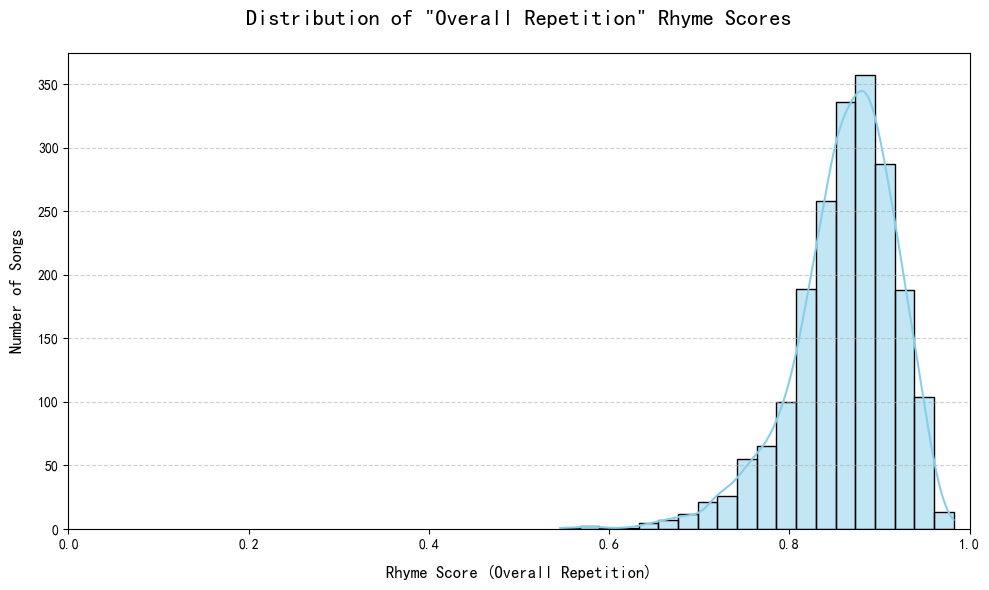

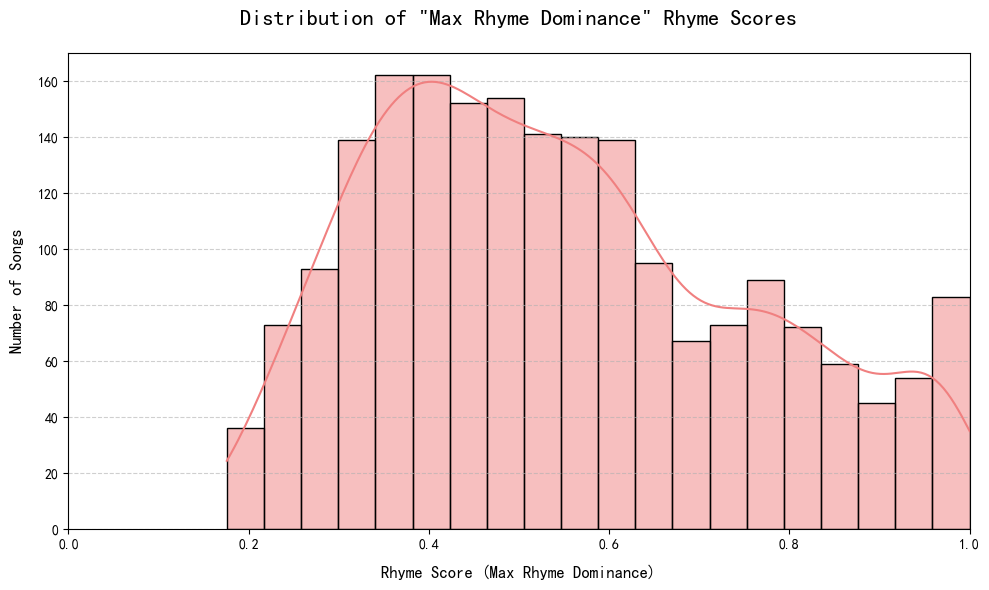


--- Overall Analysis Summary ---
Total songs included in analysis: 2028
**Overall Repetition Score** - Mean: 0.8617, Median: 0.8696, Std Dev: 0.0571
**Max Rhyme Dominance Score** - Mean: 0.5473, Median: 0.5164, Std Dev: 0.2063


In [8]:
import os
import json
import re
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import pypinyin library
from pypinyin import pinyin, Style

# Set matplotlib to display Chinese characters,
# ensuring charts render Chinese labels correctly
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def load_all_songs_data(base_path="Song"):
    """
    Loads JSON data for all songs from the specified base path.
    """
    all_songs_data = []

    for kuwo_id_dir in os.listdir(base_path):
        dir_path = os.path.join(base_path, kuwo_id_dir)

        song_path = os.path.join(dir_path, "data.json")
        with open(song_path, 'r', encoding='utf-8') as f:
            song_data = json.load(f)
            all_songs_data.append(song_data)
    return all_songs_data

def clean_lyrics(lyrics):
    """
    Cleans lyrics by removing lines containing colons, 
    content within parentheses, and empty lines.
    Returns a list where each item is a processed lyric line.
    """
    if not lyrics:
        return []
    lines = lyrics.split('\n')
    cleaned_lines = []
    for line in lines:
        # Remove lines containing Chinese or English colons
        if ':' not in line and '：' not in line:
            # Remove parentheses and their content, e.g., "(lalala)"
            line = re.sub(r'\(.*?\)', '', line)
            line = re.sub(r'（.*?）', '', line)
            cleaned_lines.append(line.strip())
    # Filter out empty lines
    return list(filter(None, cleaned_lines))

# Define a normalization map for finals (using a moderately expanded version)
YUNMU_NORMALIZATION = {
    # Nasal ending -ang series
    'ang': 'ang_rhyme', 'iang': 'ang_rhyme', 'uang': 'ang_rhyme',
    # Nasal ending -an series
    'an': 'an_rhyme', 'ian': 'an_rhyme', 'uan': 'an_rhyme',
    # Nasal ending -eng series
    'eng': 'eng_rhyme', 'ing': 'eng_rhyme', 'ueng': 'eng_rhyme',
    # Nasal ending -ong series
    'ong': 'ong_rhyme', 'iong': 'ong_rhyme',
    # Nasal ending -en series
    'en': 'en_rhyme', 'in': 'en_rhyme', 'uen': 'en_rhyme', 'un': 'en_rhyme',
    
    # Main vowels and compound finals
    'a': 'a_rhyme', 'ia': 'a_rhyme', 'ua': 'a_rhyme',
    'o': 'o_rhyme', 'uo': 'o_rhyme',
    'e': 'e_rhyme', 'ie': 'e_rhyme', 'ue': 'e_rhyme',
    'i': 'i_rhyme', 'v': 'i_rhyme', # 'v' is the pinyin representation for 'ü'
    'u': 'u_rhyme',
    
    # Compound finals -ao series
    'ao': 'ao_rhyme', 'iao': 'ao_rhyme',
    # Compound finals -ou series
    'ou': 'ou_rhyme', 'iou': 'ou_rhyme', 'iu': 'ou_rhyme',
    # Compound finals -ai series
    'ai': 'ai_rhyme', 'uai': 'ai_rhyme',
    # Compound finals -ei series
    'ei': 'ei_rhyme', 'uei': 'ei_rhyme', 'ui': 'ei_rhyme',
    
    'er': 'er_rhyme', # Erhua rhyme
}

def get_pinyin_yunmu_normalized(char):
    """
    Gets the pinyin final (yunmu) for a single Chinese character and normalizes it.
    """
    if not '\u4e00' <= char <= '\u9fa5':
        return ''
    
    pinyin_list = pinyin(char, style=Style.FINALS, heteronym=False, strict=False)
    
    if pinyin_list and pinyin_list[0]:
        raw_yunmu = pinyin_list[0][0]
        return YUNMU_NORMALIZATION.get(raw_yunmu, raw_yunmu)
    return ''

def calculate_rhyme_scores(cleaned_lyrics_lines):
    """
    Calculates two rhyme scores for lyrics: overall repetition and maximum final dominance.
    cleaned_lyrics_lines is a list of multiple lyric lines.
    Returns a tuple: (overall_repetition_score, max_dominance_score)
    """
    if not cleaned_lyrics_lines:
        return 0.0, 0.0
    
    normalized_yunmus = []
    for line in cleaned_lyrics_lines:
        line = line.strip()
        if line:
            last_char = ''
            for char in reversed(line):
                if '\u4e00' <= char <= '\u9fa5':
                    last_char = char
                    break
            
            if last_char:
                yunmu = get_pinyin_yunmu_normalized(last_char)
                if yunmu:
                    normalized_yunmus.append(yunmu)

    if not normalized_yunmus:
        return 0.0, 0.0

    yunmu_counts = Counter(normalized_yunmus)
    total_yunmus = len(normalized_yunmus)
    
    # 1. Overall Rhyme Repetition
    # sum(count - 1 for count > 1) / total
    sum_of_duplicates = sum(count - 1 for yunmu, count in yunmu_counts.items() if count > 1)
    overall_repetition_score = sum_of_duplicates / total_yunmus if total_yunmus > 0 else 0.0

    # 2. Max Rhyme Dominance
    # max(count) / total
    max_count = max(yunmu_counts.values()) if yunmu_counts else 0
    max_dominance_score = max_count / total_yunmus if total_yunmus > 0 else 0.0

    return overall_repetition_score, max_dominance_score

def get_chinese_char_ratio(lyrics_lines):
    """
    Calculates the proportion of Chinese characters in the lyrics.
    Args:
        lyrics_lines (list): A list of cleaned lyric lines.
    Returns:
        float: Number of Chinese characters / Total valid characters.
        Returns 0 if total characters is 0.
    """
    total_chars = 0
    chinese_chars = 0
    for line in lyrics_lines:
        for char in line:
            if not char.isspace(): # Count non-whitespace characters
                total_chars += 1
                if '\u4e00' <= char <= '\u9fa5': # Chinese character range
                    chinese_chars += 1
    
    return chinese_chars / total_chars if total_chars > 0 else 0

# --- Main Analysis and Plotting Process ---

def analyze_and_plot_rhyme_distribution(
    base_data_path="Song", 
    min_lyric_lines=2, 
    chinese_ratio_threshold=0.7
):
    """
    Loads data, calculates two rhyme scores for each song, plots distribution,
    and prints the highest and lowest scoring songs.
    Added: Excludes songs with too few lyric lines and too low a Chinese character ratio.
    Args:
        base_data_path (str): The root directory where song data is located.
        top_n (int): The number of highest and lowest scoring songs to print.
        min_lyric_lines (int): Minimum number of lyric lines a song must have to be processed.
        chinese_ratio_threshold (float): Minimum proportion of Chinese characters to total characters.
                                         Songs below this ratio will be considered
                                         foreign language songs and excluded.
    """
    all_songs = load_all_songs_data(base_data_path)
    
    # Store information for all eligible songs
    all_processed_songs = []
    
    skipped_single_line_count = 0
    skipped_foreign_language_count = 0
    total_songs_considered = 0

    for song in all_songs:
        total_songs_considered += 1
        song_name = song.get("name", "Unknown Song")
        releasedate_str = song.get("releasedate", "Unknown Date")
        lyrics = song.get("lyrics")

        if not lyrics:
            continue # Skip if no lyrics

        cleaned_lyr_lines = clean_lyrics(lyrics)
        
        if len(cleaned_lyr_lines) < min_lyric_lines:
            skipped_single_line_count += 1
            continue
        
        current_chinese_ratio = get_chinese_char_ratio(cleaned_lyr_lines)
        if current_chinese_ratio < chinese_ratio_threshold:
            skipped_foreign_language_count += 1
            continue

        # Calculate rhyme scores
        overall_score, dominance_score = calculate_rhyme_scores(cleaned_lyr_lines) 
        
        # Ensure scores are valid and not zero
        if overall_score is not None and dominance_score is not None and \
           (overall_score > 0 or dominance_score > 0): 
            all_processed_songs.append({
                "name": song_name,
                "releasedate": releasedate_str,
                "overall_repetition_score": overall_score,
                "max_dominance_score": dominance_score,
                "cleaned_lyrics": "\n".join(cleaned_lyr_lines) # Store as string for printing
            })

    print(f"\nFiltering Statistics:")
    print(f"  Total songs considered: {total_songs_considered}")
    print(f"  Songs skipped due to fewer than {min_lyric_lines} lyric lines: {skipped_single_line_count}")
    print(f"  Songs skipped due to Chinese ratio below {chinese_ratio_threshold:.2f}"
          f" (foreign language songs): {skipped_foreign_language_count}")
    print(f"  Finally processed {len(all_processed_songs)} eligible songs.")

    # Extract two rhyme scores for plotting
    overall_scores_for_plot = [s["overall_repetition_score"] for s in all_processed_songs]
    dominance_scores_for_plot = [s["max_dominance_score"] for s in all_processed_songs]

    # --- Plot Overall Rhyme Repetition Distribution ---
    plt.figure(figsize=(10, 6))
    sns.histplot(overall_scores_for_plot, kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of "Overall Repetition" Rhyme Scores', fontsize=16, pad=20)
    plt.xlabel('Rhyme Score (Overall Repetition)', fontsize=12, labelpad=10)
    plt.ylabel('Number of Songs', fontsize=12, labelpad=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    # --- Plot Max Rhyme Dominance Distribution ---
    plt.figure(figsize=(10, 6))
    sns.histplot(dominance_scores_for_plot, kde=True, bins=20, color='lightcoral', edgecolor='black')
    plt.title('Distribution of "Max Rhyme Dominance" Rhyme Scores', fontsize=16, pad=20)
    plt.xlabel('Rhyme Score (Max Rhyme Dominance)', fontsize=12, labelpad=10)
    plt.ylabel('Number of Songs', fontsize=12, labelpad=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    print("\n--- Overall Analysis Summary ---")
    print(f"Total songs included in analysis: {len(all_processed_songs)}")
    print(f"**Overall Repetition Score** - Mean: {np.mean(overall_scores_for_plot):.4f}"
          f", Median: {np.median(overall_scores_for_plot):.4f}"
          f", Std Dev: {np.std(overall_scores_for_plot):.4f}")
    print(f"**Max Rhyme Dominance Score** - Mean: {np.mean(dominance_scores_for_plot):.4f}"
          f", Median: {np.median(dominance_scores_for_plot):.4f}"
          f", Std Dev: {np.std(dominance_scores_for_plot):.4f}")
    
song_data_path = "Song"
analyze_and_plot_rhyme_distribution(
    base_data_path=song_data_path,
    min_lyric_lines=20,
    chinese_ratio_threshold=0.7)

d:\code\python\1\Lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\33398\AppData\Local\Temp\jieba.cache
Loading model cost 0.517 seconds.
Prefix dict has been built successfully.



--- Top 30 Word Frequencies ---
'爱': 4779
'想': 1981
'心': 1203
'走': 1157
'世界': 945
'知道': 945
'永远': 852
'爱情': 762
'梦': 725
'一起': 724
'回忆': 672
'曾经': 664
'一生': 626
'心里': 564
'笑': 561
'陪': 559
'一天': 552
'听': 539
'懂': 532
'心中': 526
'忘': 521
'温柔': 517
'现在': 516
'寂寞': 513
'离开': 507
'总是': 502
'快乐': 500
'感觉': 498
'明白': 488
'不想': 486
------------------------------------



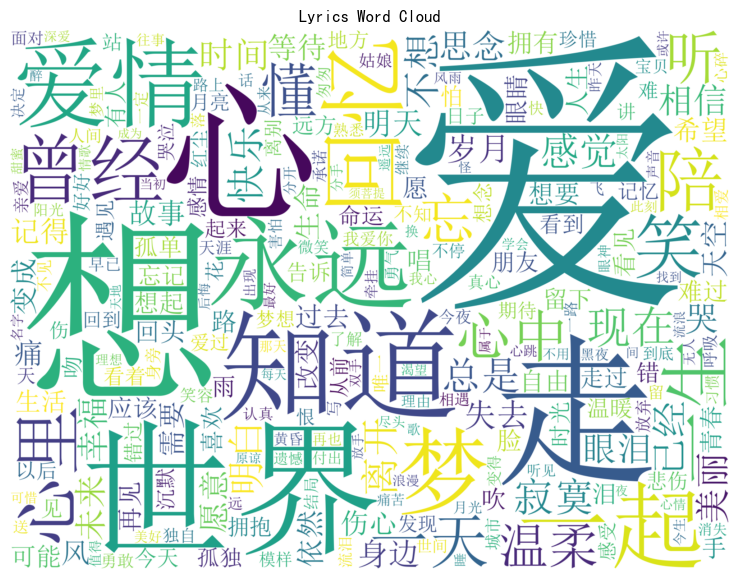

In [9]:
import os
import json
import re
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Set matplotlib to support Chinese display
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def load_lyrics_from_json(file_path):
    """
    Loads lyrics from a JSON file.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        return data.get('lyrics', '')

def preprocess_lyrics(lyrics):
    """
    Preprocesses lyrics: removes lines with
    colons, English, numbers, and special characters,
    and then performs word segmentation.
    """
    lines = lyrics.split('\n')
    cleaned_lines = []
    for line in lines:
        if ':' not in line and '：' not in line:
            cleaned_lines.append(line)
    cleaned_lyrics = '\n'.join(cleaned_lines)
    cleaned_lyrics = re.sub(r'[^\u4e00-\u9fa5]', '', cleaned_lyrics)
    
    return cleaned_lyrics

def get_stopwords(file_path='stopwords.txt'):
    """
    Loads a list of stopwords.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set([line.strip() for line in f])
    return stopwords

def generate_wordcloud_and_print_frequency(
    text,
    font_path='SimHei.ttf',
    image_name='wordcloud.png',
    top_n=20
):
    """
    Generates a word cloud image and prints the frequency of the top_n most common words.
    """
    # Generate word frequencies
    words = text.split()
    word_counts = Counter(words)
    
    print(f"\n--- Top {top_n} Word Frequencies ---")
    for word, count in word_counts.most_common(top_n):
        print(f"'{word}': {count}")
    print("------------------------------------\n")

    wordcloud = WordCloud(font_path=font_path, 
                          width=2000, 
                          height=1500, 
                          background_color="white", 
                          max_words=250,
                          min_font_size=10,
                          collocations=False
                         ).generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Lyrics Word Cloud")
    plt.savefig(image_name)
    plt.show()

if __name__ == "__main__":
    song_data_dir = "Song"
    all_lyrics = []

    # Ensure the stopwords file exists
    stopwords = get_stopwords()

    # Iterate through all subfolders in the 'Song' directory
    for song_id_folder in os.listdir(song_data_dir):
        song_path = os.path.join(song_data_dir, song_id_folder)
        if os.path.isdir(song_path):
            json_file_path = os.path.join(song_path, "data.json")
            lyrics = load_lyrics_from_json(json_file_path)
            if lyrics:
                preprocessed = preprocess_lyrics(lyrics)
                all_lyrics.append(preprocessed)

    # Combine all lyrics into a single long string
    combined_lyrics = " ".join(all_lyrics)

    # Chinese word segmentation
    # Use jieba for word segmentation and filter out stopwords
    seg_list = jieba.cut(combined_lyrics, cut_all=False)
    filtered_words = [word for word in seg_list if word.strip() and word.strip() not in stopwords]
    final_text = " ".join(filtered_words)

    # Generate the word cloud and print word frequencies
    generate_wordcloud_and_print_frequency(
        final_text,
        font_path='SIMSUN.TTC',
        image_name='music_wordcloud.png',
        top_n=30
    )